In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import cv2
import os
from zipfile import ZipFile
import time
from datetime import datetime
import itertools

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras import utils
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Checking the installed version of TensorFlow.

tf.__version__

'2.8.2'

In [ ]:
# Testing to ensure GPU is being utilized.

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
!nvidia-smi

Wed Jun  8 01:52:10 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     9W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**데이터 37428개**

1) All-Age-Faces 데이터 : 13322개, Asian 얼굴 이미지

2) UTKFace 데이터 : 24106개, 여러 국적 사람들의 이미지

## Deep Learning: Data Importing

1) All-Age-Faces 데이터

https://github.com/JingchunCheng/All-Age-Faces-Dataset
에서 다운로드 후 구글 드라이브 -> Colab Notebooks/datasets 에 파일 넣고 확인

aaf_data.xlsx 파일 가져오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/All-Age-Faces.zip'

-rw------- 1 root root 365164027 May 27 04:32 '/content/drive/My Drive/Colab Notebooks/datasets/All-Age-Faces.zip'


In [ ]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/All-Age-Faces.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: All-Age-Faces Dataset/original images/08322A18.jpg  
  inflating: All-Age-Faces Dataset/original images/08323A18.jpg  
  inflating: All-Age-Faces Dataset/original images/08324A18.jpg  
  inflating: All-Age-Faces Dataset/original images/08325A18.jpg  
  inflating: All-Age-Faces Dataset/original images/08326A18.jpg  
  inflating: All-Age-Faces Dataset/original images/08327A18.jpg  
  inflating: All-Age-Faces Dataset/original images/08328A18.jpg  
  inflating: All-Age-Faces Dataset/original images/08329A18.jpg  
  inflating: All-Age-Faces Dataset/original images/08330A18.jpg  
  inflating: All-Age-Faces Dataset/original images/08331A18.jpg  
  inflating: All-Age-Faces Dataset/original images/08332A18.jpg  
  inflating: All-Age-Faces Dataset/original images/08333A18.jpg  
  inflating: All-Age-Faces Dataset/original images/08334A18.jpg  
  inflating: All-Age-Faces Dataset/original images/08335A18.jpg  
  inflating: All-Age-Faces Dataset/origi

In [ ]:
!ls -l

total 3008
-rw-r--r-- 1 root root  234555 Jun  8 01:52  aaf_data.xlsx
drwxr-xr-x 7 root root    4096 Feb 26  2019 'All-Age-Faces Dataset'
-rw-r--r-- 1 root root 2828329 Jun  8 01:52  df_mega.xlsx
drwx------ 5 root root    4096 Jun  8 01:52  drive
drwxr-xr-x 1 root root    4096 Jun  1 13:50  sample_data


In [ ]:
!ls -l 'All-Age-Faces Dataset'

total 1144
drwxr-xr-x 2 root root 385024 Feb 26  2019 'aglined faces'
drwxr-xr-x 2 root root   4096 Feb 26  2019  example
drwxr-xr-x 2 root root   4096 Feb 26  2019 'image sets'
drwxr-xr-x 2 root root 393216 Feb 26  2019 'key points'
drwxr-xr-x 2 root root 385024 Feb 26  2019 'original images'


In [ ]:
df_aaf = pd.read_excel('aaf_data.xlsx')
df_aaf

,img_name,gender,age,ethnicity
0,00000A02.jpg,1,2,2
1,00002A02.jpg,1,2,2
2,00004A02.jpg,1,2,2
3,00006A02.jpg,1,2,2
4,00008A02.jpg,1,2,2
...,...,...,...,...
13317,13312A80.jpg,0,80,2
13318,13314A80.jpg,0,80,2
13319,13316A80.jpg,0,80,2
13320,13318A80.jpg,0,80,2


In [ ]:
df_aaf['img_name'] = '/content/All-Age-Faces Dataset/original images/' + df_aaf['img_name'].astype(str)
df_aaf

,img_name,gender,age,ethnicity
0,/content/All-Age-Faces Dataset/original images...,1,2,2
1,/content/All-Age-Faces Dataset/original images...,1,2,2
2,/content/All-Age-Faces Dataset/original images...,1,2,2
3,/content/All-Age-Faces Dataset/original images...,1,2,2
4,/content/All-Age-Faces Dataset/original images...,1,2,2
...,...,...,...,...
13317,/content/All-Age-Faces Dataset/original images...,0,80,2
13318,/content/All-Age-Faces Dataset/original images...,0,80,2
13319,/content/All-Age-Faces Dataset/original images...,0,80,2
13320,/content/All-Age-Faces Dataset/original images...,0,80,2


2) UTKFace 데이터 : 24106개, 여러 국적 사람들의 이미지

In [ ]:
!pip install --upgrade --no-cache-dir gdown

# UTKFace download from Auther's Google Drive
import gdown
google_path = 'https://drive.google.com/uc?id='
file_id = '16uEk67PncGCl0GxBRfa0iXfobODcs4tu'
output_name = '04_UTKFace.zip'
gdown.download(google_path+file_id,output_name,quiet=False)
# https://drive.google.com/file/d/16uEk67PncGCl0GxBRfa0iXfobODcs4tu/view?usp=sharing

# Unzip at Colab Root Directory 

!unzip /content/04_UTKFace.zip -d /content/

# Screen Cleaning, there are too many files to display.
from IPython.display import clear_output 
clear_output()

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

DATA_DIR_TR = "/content/train/"
DATA_DIR_TS = "/content/test/"


IM_WIDTH = IM_HEIGHT = 198
ID_GENDER_MAP = {0: 0, 1: 1}
GENDER_ID_MAP = dict((g, i) for i, g in ID_GENDER_MAP.items())
ID_RACE_MAP = {0: 0, 1: 1, 2: 2, 3: 3, 4: 4}
RACE_ID_MAP = dict((r, i) for i, r in ID_RACE_MAP.items())

ID_GENDER_MAP, GENDER_ID_MAP, ID_RACE_MAP, RACE_ID_MAP

({0: 0, 1: 1},
 {0: 0, 1: 1},
 {0: 0, 1: 1, 2: 2, 3: 3, 4: 4},
 {0: 0, 1: 1, 2: 2, 3: 3, 4: 4})

In [ ]:
def parse_filepath(filepath):
    try:
        path, filename = os.path.split(filepath)
        filename, ext = os.path.splitext(filename)
        age, gender, race, _ = filename.split("_")
        return int(age), ID_RACE_MAP[int(race)], ID_GENDER_MAP[int(gender)]
    except Exception as e:
        print(filepath)
        return None, None, None

# create a pandas data frame of images, age, gender and race
files_TR = glob.glob(os.path.join(DATA_DIR_TR, "*.jpg"))
files_TS = glob.glob(os.path.join(DATA_DIR_TS, "*.jpg"))
files = files_TR + files_TS

attributes = list(map(parse_filepath, files))

df_utk = pd.DataFrame(attributes)
df_utk['file'] = files
df_utk.columns = ['age', 'ethnicity', 'gender', 'img_name']
df_utk = df_utk.dropna()
df_utk

,age,ethnicity,gender,img_name
0,29,0,1,/content/train/29_1_0_20170109134431956.jpg
1,66,0,1,/content/train/66_1_0_20170110123225778.jpg
2,35,0,1,/content/train/35_1_0_20170103182733994.jpg
3,26,1,0,/content/train/26_0_1_20170113151606607.jpg
4,22,1,0,/content/train/22_0_1_20170113133555880.jpg
...,...,...,...,...
24101,28,3,1,/content/test/28_1_3_20170119194459995.jpg
24102,78,0,1,/content/test/78_1_0_20170120230525666.jpg
24103,45,3,0,/content/test/45_0_3_20170119201309141.jpg
24104,25,4,1,/content/test/25_1_4_20170117123859839.jpg


In [ ]:
# Creating a new dataframe to hold all filenames, corresponding ages and class labels.

df_aaf_gender = pd.DataFrame()
df_aaf_gender['filename'] = df_aaf['img_name']
df_aaf_gender['gender'] = df_aaf['gender']

df_aaf_gender.head()

,filename,gender
0,/content/All-Age-Faces Dataset/original images...,1
1,/content/All-Age-Faces Dataset/original images...,1
2,/content/All-Age-Faces Dataset/original images...,1
3,/content/All-Age-Faces Dataset/original images...,1
4,/content/All-Age-Faces Dataset/original images...,1


In [ ]:
# Creating a new dataframe to hold all filenames, corresponding ages and class labels.

df_utk_gender = pd.DataFrame()
df_utk_gender['filename'] = df_utk['img_name']
df_utk_gender['gender'] = df_utk['gender']

df_utk_gender.head()

,filename,gender
0,/content/train/29_1_0_20170109134431956.jpg,1
1,/content/train/66_1_0_20170110123225778.jpg,1
2,/content/train/35_1_0_20170103182733994.jpg,1
3,/content/train/26_0_1_20170113151606607.jpg,0
4,/content/train/22_0_1_20170113133555880.jpg,0


3) 데이터 합치기(37428)

In [ ]:
df_all = pd.concat([df_aaf_gender, df_utk_gender])
df_all

,filename,gender
0,/content/All-Age-Faces Dataset/original images...,1
1,/content/All-Age-Faces Dataset/original images...,1
2,/content/All-Age-Faces Dataset/original images...,1
3,/content/All-Age-Faces Dataset/original images...,1
4,/content/All-Age-Faces Dataset/original images...,1
...,...,...
24101,/content/test/28_1_3_20170119194459995.jpg,1
24102,/content/test/78_1_0_20170120230525666.jpg,1
24103,/content/test/45_0_3_20170119201309141.jpg,0
24104,/content/test/25_1_4_20170117123859839.jpg,1


In [ ]:
#인덱스 다시 설정
df_all.reset_index(drop =False, inplace = True)
df_all = df_all.drop(['index'], axis = 1)
df_all

,filename,gender
0,/content/All-Age-Faces Dataset/original images...,1
1,/content/All-Age-Faces Dataset/original images...,1
2,/content/All-Age-Faces Dataset/original images...,1
3,/content/All-Age-Faces Dataset/original images...,1
4,/content/All-Age-Faces Dataset/original images...,1
...,...,...
37423,/content/test/28_1_3_20170119194459995.jpg,1
37424,/content/test/78_1_0_20170120230525666.jpg,1
37425,/content/test/45_0_3_20170119201309141.jpg,0
37426,/content/test/25_1_4_20170117123859839.jpg,1


In [ ]:
import plotly.graph_objects as go
def plot_distribution(pd_series):
    labels = pd_series.value_counts().index.tolist()
    counts = pd_series.value_counts().values.tolist()
    
    colors = ['blue','red'] 
    pie_plot = go.Pie(labels=labels, values=counts, hole=.3)
    fig = go.Figure(data=[pie_plot])
    fig.update_layout(title_text='Distribution for %s' % pd_series.name)
    fig.update_traces(marker=dict(colors=['skyblue', 'pink']))

    fig.show()

In [ ]:
bins = [-1, 0, np.inf]
names = ['남', '여']
age_binned = pd.cut(df_all['gender'], bins, labels=names)
plot_distribution(age_binned)

4) 나이 분류 추가

0-9세 / 10-19세 / 20-29세 / 30-39세 / 40-49세 / 50-59세 / 60-69세 / 70세- 

In [ ]:
# Shuffling the rows of combined_df so as to mix together the rows coming from both subreddit datasets.
df_all = shuffle(df_all, random_state=42).reset_index(drop=True)
df_all.head()

,filename,gender
0,/content/train/28_1_2_20170116190120209.jpg,1
1,/content/train/26_0_1_20170114033050455.jpg,0
2,/content/train/27_1_0_20170103181541352.jpg,1
3,/content/All-Age-Faces Dataset/original images...,0
4,/content/test/60_0_3_20170119204312254.jpg,0


In [ ]:
df_all['gender'].value_counts()

1    18906
0    18522
Name: gender, dtype: int64

In [ ]:
# Defining the filenames and ages from above master_df as X, and target as y for splitting into train and test datasets later.


X = df_all[['filename']]
y = df_all['gender']

In [ ]:
# Splitting the dataset into training and testing datasets with test_size=0.3 and stratify=y. 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape

(26199, 1)

In [ ]:
X_train.head()

,filename
5985,/content/All-Age-Faces Dataset/original images...
8865,/content/train/41_0_1_20170116183322571.jpg
17645,/content/train/50_0_1_20170113134715664.jpg
6517,/content/train/51_0_1_20170117173642448.jpg
15943,/content/All-Age-Faces Dataset/original images...


In [ ]:
X_test.shape

(11229, 1)

In [ ]:
X_test.head()

,filename
21314,/content/train/43_0_2_20170112220312529.jpg
30078,/content/All-Age-Faces Dataset/original images...
15499,/content/train/16_1_1_20170112191246585.jpg
4229,/content/All-Age-Faces Dataset/original images...
34496,/content/train/55_0_0_20170111203845708.jpg


In [ ]:
# Creating copies of X and y (both train and test) from above to create a dataframe of filepaths to all images and their target labels.
# These dataframes will be in the deep learning models later to create dataset input pipelines using TensorFlow.data.Dataset API.

temp_X_train = X_train.copy()
temp_X_train['gender'] = y_train

temp_X_test = X_test.copy()
temp_X_test['gender'] = y_test

In [ ]:
# Defining a function to append the filepath to each image name as a string.

combined_faces_path = ""

def append_path_to_filename(filename):
    return os.path.join(combined_faces_path, filename)

In [ ]:
# Mapping the above created function on both dataframes created above.

temp_X_train['filename'] = temp_X_train['filename'].map(append_path_to_filename)
temp_X_test['filename'] = temp_X_test['filename'].map(append_path_to_filename)

In [ ]:
# Exporting the above created dataframes as CSV files.

temp_X_train.to_csv("/content/drive/My Drive/Colab Notebooks/datasets/images_filenames_labels_train_gender.csv", index=False)
temp_X_test.to_csv("/content/drive/My Drive/Colab Notebooks/datasets/images_filenames_labels_test_gender.csv", index=False)

In [ ]:
# Importing the training and testing datasets to create tensors of images using the filename paths.

train_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/datasets/images_filenames_labels_train_gender.csv")
test_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/datasets/images_filenames_labels_test_gender.csv")

In [ ]:
train_df.head()

,filename,gender
0,/content/All-Age-Faces Dataset/original images...,1
1,/content/train/40_0_0_20170117154520771.jpg,0
2,/content/train/25_1_0_20170104165326705.jpg,1
3,/content/train/40_0_4_20170104201550378.jpg,0
4,/content/All-Age-Faces Dataset/original images...,1


In [ ]:
test_df.head()

,filename,gender
0,/content/train/25_1_0_20170117134403373.jpg,1
1,/content/All-Age-Faces Dataset/original images...,1
2,/content/train/15_1_2_20170104015856031.jpg,1
3,/content/All-Age-Faces Dataset/original images...,0
4,/content/train/68_1_1_20170113012709282.jpg,1


In [ ]:
train_df.shape

(26199, 2)

In [ ]:
test_df.shape

(11229, 2)

In [ ]:
# Converting the filenames and target class labels into lists for both train and test datasets.

train_filenames_list = list(train_df['filename'])
train_labels_list = list(train_df['gender'])

test_filenames_list = list(test_df['filename'])
test_labels_list = list(test_df['gender'])

In [ ]:
# Creating tensorflow constants of filenames and labels for train and test datasets from the lists defined above.

train_filenames_tensor = tf.constant(train_filenames_list)
train_labels_tensor = tf.constant(train_labels_list)

test_filenames_tensor = tf.constant(test_filenames_list)
test_labels_tensor = tf.constant(test_labels_list)

In [ ]:
# Defining the number of classes and a function to read, decode the image from given tensor and one-hot encode the image label class.

num_classes = 2

def _parse_function(filename, label):
    
    image_string = tf.io.read_file(filename)
    image_decoded = tf.io.decode_jpeg(image_string, channels=3)    # channels=1 to convert to grayscale, channels=3 to convert to RGB.
    image_resized = tf.image.resize(image_decoded, [200, 200])
    label = tf.one_hot(label, num_classes)

    return image_resized, label

In [ ]:
# Getting the dataset ready for the neural network.
# Using the tensor vectors defined above, accessing the images in the dataset and passing them through the function defined above.

train_dataset = tf.data.Dataset.from_tensor_slices((train_filenames_tensor, train_labels_tensor))
train_dataset = train_dataset.map(_parse_function)
train_dataset = train_dataset.repeat(3)
train_dataset = train_dataset.batch(64)    # Same as batch_size hyperparameter in model.fit() below.

test_dataset = tf.data.Dataset.from_tensor_slices((test_filenames_tensor, test_labels_tensor))
test_dataset = test_dataset.map(_parse_function)
# test_dataset = test_dataset.repeat(3)
test_dataset = test_dataset.batch(64)    # Same as batch_size hyperparameter in model.fit() below.

## Deep Learning: Classification Modelling

In [ ]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights = 'imagenet',
                  include_top = False,
                  input_shape = (200, 200, 3))

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0     

In [ ]:
print('conv_base 동결 전 훈련 가능 가중치의 종류:', len(conv_base.trainable_weights))

conv_base 동결 전 훈련 가능 가중치의 종류: 26


In [ ]:
set_trainable = False

for layer in conv_base.layers:
    if layer.name == 'block4_conv1':
        set_trainable = True
        
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
print('conv_base 동결 후 훈련 가능 가중치의 종류:', len(conv_base.trainable_weights))

conv_base 동결 후 훈련 가능 가중치의 종류: 12


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0     

In [ ]:
from tensorflow.keras import models, layers

model2 = models.Sequential(name = 'CNN_VGG16')
model2.add(conv_base)

model2.add(layers.Flatten())
model2.add(layers.Dropout(0.4))
model2.add(layers.Dense(256, activation = 'relu'))
model2.add(layers.Dense(2, activation='softmax'))

In [ ]:
model2.summary()

Model: "CNN_VGG16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 6, 6, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dropout (Dropout)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 256)               4718848   
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 19,434,050
Trainable params: 17,698,562
Non-trainable params: 1,735,488
_________________________________________________________________


In [ ]:
from tensorflow.keras import optimizers

model2.compile(loss = 'categorical_crossentropy',
              optimizer = optimizers.Adam(learning_rate = 0.000005),
              metrics = ['accuracy'])

In [ ]:
# Defining the early stop to monitor the validation loss to avoid overfitting.

early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')

In [ ]:
# Fitting the model.

vgg_history = model2.fit(train_dataset,
                        batch_size=64,
                        validation_data=test_dataset,
                        epochs=10,
                        callbacks=[early_stop],
                        shuffle=False    # shuffle=False to reduce randomness and increase reproducibility
                       )

Epoch 1/10
1229/1229 [==============================] - 700s 556ms/step - loss: 0.7553 - accuracy: 0.7542 - val_loss: 0.3463 - val_accuracy: 0.8513
Epoch 2/10
1229/1229 [==============================] - 688s 560ms/step - loss: 0.2962 - accuracy: 0.8744 - val_loss: 0.2932 - val_accuracy: 0.8759
Epoch 3/10
1229/1229 [==============================] - 685s 558ms/step - loss: 0.1954 - accuracy: 0.9228 - val_loss: 0.2729 - val_accuracy: 0.8933
Epoch 4/10
1229/1229 [==============================] - 686s 558ms/step - loss: 0.1190 - accuracy: 0.9558 - val_loss: 0.2692 - val_accuracy: 0.9075
Epoch 5/10
1229/1229 [==============================] - 683s 555ms/step - loss: 0.0664 - accuracy: 0.9777 - val_loss: 0.3557 - val_accuracy: 0.8942
Epoch 6/10
1229/1229 [==============================] - 684s 556ms/step - loss: 0.0394 - accuracy: 0.9876 - val_loss: 0.3368 - val_accuracy: 0.9137
Epoch 7/10
1229/1229 [==============================] - 691s 563ms/step - loss: 0.0264 - accuracy: 0.9917 - val_

In [ ]:
# Checking the train and test loss and accuracy values from the neural network above.

train_loss1 = vgg_history.history['loss']
test_loss1 = vgg_history.history['val_loss']
train_accuracy1 = vgg_history.history['accuracy']
test_accuracy1 = vgg_history.history['val_accuracy']

Text(0.5, 0.92, 'Lineplots showing loss and accuracy of VGG model by epochs')

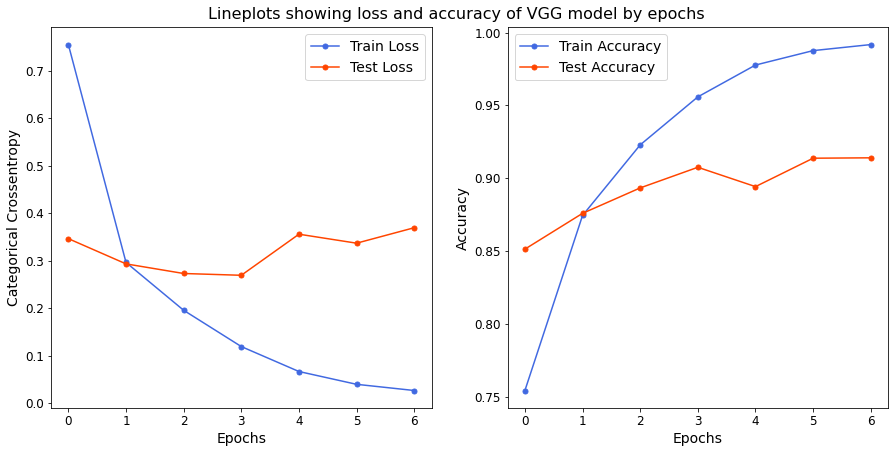

In [ ]:
# Plotting a line chart to visualize the loss and accuracy values by epochs.

fig, ax = plt.subplots(ncols=2, figsize=(15,7))

ax = ax.ravel()

ax[0].plot(train_loss1, label='Train Loss', color='royalblue', marker='o', markersize=5)
ax[0].plot(test_loss1, label='Test Loss', color = 'orangered', marker='o', markersize=5)

ax[0].set_xlabel('Epochs', fontsize=14)
ax[0].set_ylabel('Categorical Crossentropy', fontsize=14)

ax[0].legend(fontsize=14)
ax[0].tick_params(axis='both', labelsize=12)

ax[1].plot(train_accuracy1, label='Train Accuracy', color='royalblue', marker='o', markersize=5)
ax[1].plot(test_accuracy1, label='Test Accuracy', color='orangered', marker='o', markersize=5)

ax[1].set_xlabel('Epochs', fontsize=14)
ax[1].set_ylabel('Accuracy', fontsize=14)

ax[1].legend(fontsize=14)
ax[1].tick_params(axis='both', labelsize=12)

fig.suptitle(x=0.5, y=0.92, t="Lineplots showing loss and accuracy of VGG model by epochs", fontsize=16)



In [ ]:
# Evaluating the model on test dataset.

vgg_score = model2.evaluate(test_dataset, verbose=1)

176/176 [==============================] - 46s 263ms/step - loss: 0.3694 - accuracy: 0.9140


In [ ]:
# Printing the relevant score summary.

cnn1_labels = model2.metrics_names
print(f'VGG16 Fine Tunning model2 {vgg_labels[0]} \t= {round(vgg_score[0], 3)}')
print(f'VGG16 Fine Tunning model2 {vgg_labels[1]} \t= {round(vgg_score[1], 3)}')

VGG16 Fine Tunning model2 loss 	= 0.369
VGG16 Fine Tunning model2 accuracy 	= 0.914


In [ ]:
# Saving the model as a h5 file for possible use later.


model2.save('/content/drive/My Drive/Colab Notebooks/models/gender_vgg16_fine_tuning_2.h5')

In [ ]:
!ls -l /content/drive/My\ Drive/Colab\ Notebooks/models

total 2192092
-rw------- 1 root root  219438744 Jun  6 08:24 age_vgg16_fine_tuning_2.h5
-rw------- 1 root root  172226608 May 31 08:31 age_vgg16_fine_tunning.h5
-rw------- 1 root root  369054916 Jun  4 10:23 age_vggface1.h5
-rw------- 1 root root 1090931536 May 30 12:34 age_vgg.h5
-rw------- 1 root root     489104 May 31 10:08 gender_cnn1.h5
-rw------- 1 root root  172208176 Jun  7 08:09 gender_vgg16_fine_tuning_1.h5
-rw------- 1 root root  219420296 Jun  8 03:16 gender_vgg16_fine_tuning_2.h5
-rw------- 1 root root     930127 May 31 10:07 haarcascade_frontalface_default.xml


In [ ]:
# Generating predictions from the model above.

model_pred = model2.predict(test_dataset)
model_pred = model_pred.argmax(axis=-1)

In [ ]:
len(model_pred)

11229

In [ ]:
len(test_labels_list)

11229

In [ ]:
# Generating a confusion matrix based on above predictions.

conf_mat1 = confusion_matrix(test_labels_list,model_pred)
conf_mat1

array([[5092,  476],
       [ 490, 5171]])

In [ ]:
# Defining a function to plot the confusion matrix in a grid for easier visualization.

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', export_as='confusion_matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=16)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True labels', fontsize=14)
    plt.xlabel('Predicted labels', fontsize=14)



Normalized confusion matrix


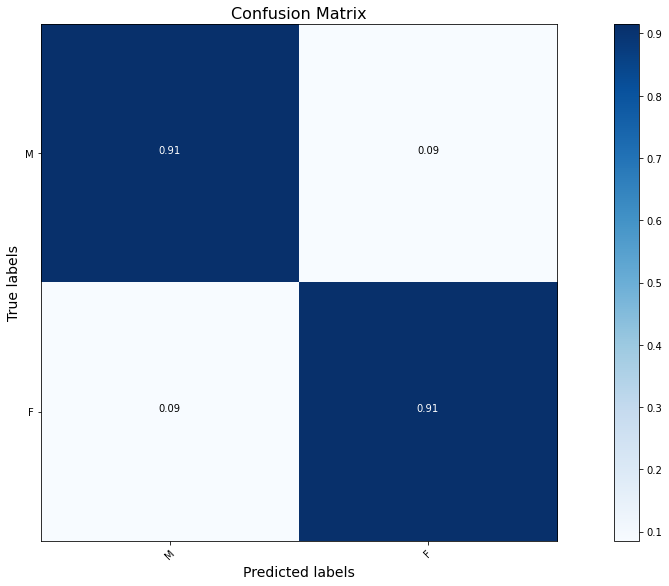

In [ ]:
# Plotting the NORMALIZED confusion matrix using the function defined above.

cm_plot_labels = ['M','F']


plt.figure(figsize=(16,8))
plot_confusion_matrix(conf_mat1, cm_plot_labels, normalize=True)

plt.show()